In [1]:
#Import necessary libraries and packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') #Removes deprecation warnings
import os

In [2]:
#Read the housing_data_clean.csv file into a dataframe
df = pd.read_csv('housing_data_clean.csv')
df.head()
df.shape

(7855, 16)

In [3]:
#Review features
df.dtypes

APN                         object
Address - Street Number      int64
Address - Street Name       object
Address - Zip Code           int64
Bedrooms                     int64
Bathrooms                    int64
MTRO Square Footage          int64
Lot Size - Acres           float64
Year Built                   int64
DOM                          int64
CDOM                         int64
Original Price               int64
List Price                   int64
Close Price                  int64
Close Date                  object
DPRIME                     float64
dtype: object

In [4]:
#Remove APN, Street Number, Street Name, Zip (since all zipcodes are 95608), DOM, 
#Original Price, and List Price
columns_to_drop = ['APN', 'Address - Street Number', 'Address - Street Name', 'Address - Zip Code','DOM',
                  'Original Price', 'List Price']

df2 = df.drop(columns = columns_to_drop)
df2.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,Close Date,DPRIME
0,4,3,2123,0.21,1962,28,235000,2000-05-08,9.0
1,3,2,1832,0.21,1984,10,278000,2000-05-08,9.0
2,3,3,1480,0.19,1992,399,157500,2000-07-05,9.5
3,4,2,1994,0.17,1991,80,217000,2000-07-05,9.5
4,3,2,1451,0.23,1980,46,174000,2000-07-05,9.5


In [5]:
df2.shape

(7855, 9)

#### 1. Creating dummy features
'Close Date' needs to be converted to dummy variables since it is currently a date-time feature (not numeric).

In [6]:
#Convert 'Close Date' to datetime data type
df2['Close Date'] = pd.to_datetime(df2['Close Date'])

#Extract year and month from 'Close Date' and create dummy variables for the year and month
df2 = pd.concat([df2, pd.get_dummies(df2['Close Date'].dt.year, prefix='year')], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['Close Date'].dt.month, prefix='month')], axis=1)

#### 2. Scale standardization

array([[<AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'Bathrooms'}>,
        <AxesSubplot:title={'center':'MTRO Square Footage'}>,
        <AxesSubplot:title={'center':'Lot Size - Acres'}>,
        <AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'CDOM'}>,
        <AxesSubplot:title={'center':'Close Price'}>],
       [<AxesSubplot:title={'center':'Close Date'}>,
        <AxesSubplot:title={'center':'DPRIME'}>,
        <AxesSubplot:title={'center':'year_2000'}>,
        <AxesSubplot:title={'center':'year_2001'}>,
        <AxesSubplot:title={'center':'year_2002'}>,
        <AxesSubplot:title={'center':'year_2003'}>,
        <AxesSubplot:title={'center':'year_2004'}>],
       [<AxesSubplot:title={'center':'year_2005'}>,
        <AxesSubplot:title={'center':'year_2006'}>,
        <AxesSubplot:title={'center':'year_2007'}>,
        <AxesSubplot:title={'center':'year_2008'}>,
        <AxesSubplot:title={'center':'year_2009'}>

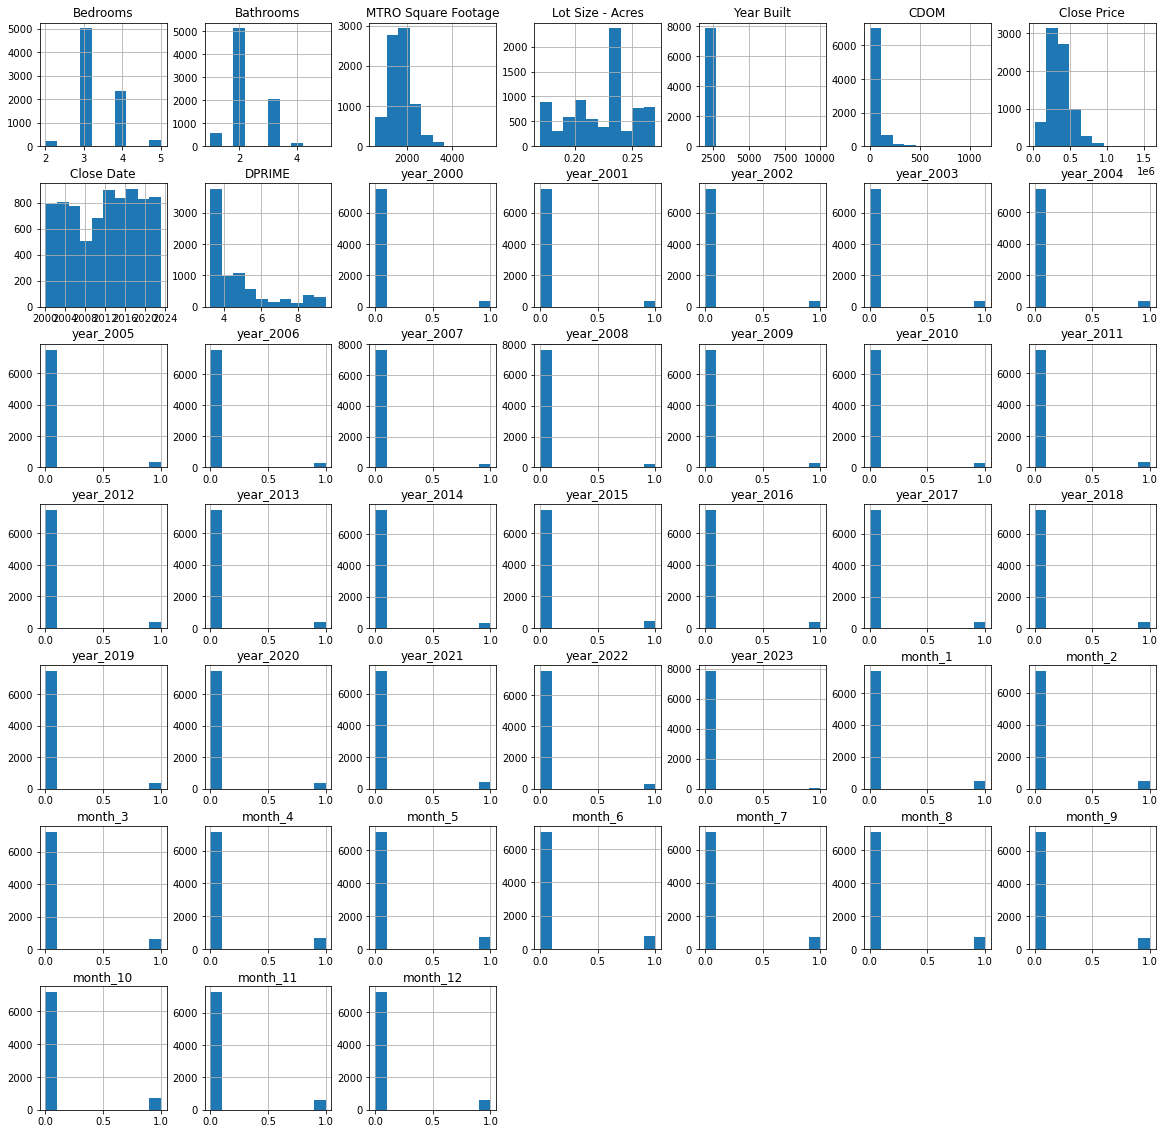

In [7]:
df2.hist(figsize=(20,20))

In [8]:
#There's an obvious error in 'Year Built' (a few entries with future dates) which we'll need to fix before moving on
df2 = df2[df2['Year Built'] <= 2023]
df2.shape

(7851, 45)

<AxesSubplot:>

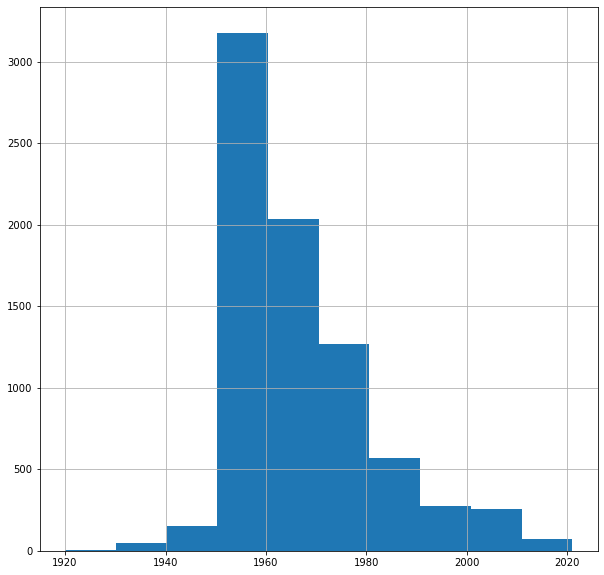

In [9]:
df2['Year Built'].hist(figsize=(10,10))

In [10]:
#Review features
df2.dtypes

Bedrooms                        int64
Bathrooms                       int64
MTRO Square Footage             int64
Lot Size - Acres              float64
Year Built                      int64
CDOM                            int64
Close Price                     int64
Close Date             datetime64[ns]
DPRIME                        float64
year_2000                       uint8
year_2001                       uint8
year_2002                       uint8
year_2003                       uint8
year_2004                       uint8
year_2005                       uint8
year_2006                       uint8
year_2007                       uint8
year_2008                       uint8
year_2009                       uint8
year_2010                       uint8
year_2011                       uint8
year_2012                       uint8
year_2013                       uint8
year_2014                       uint8
year_2015                       uint8
year_2016                       uint8
year_2017   

In [11]:
#Select all numeric features to standardize (excluding target 'Close Price') 
numeric_features = ['Bedrooms','Bathrooms','MTRO Square Footage','Lot Size - Acres','Year Built','CDOM','DPRIME']

#Create a new DataFrame containing only the numerical columns
columns_to_standardize = df2[numeric_features]

#Initialize the StandardScaler
scaler = StandardScaler()

#Fit and transform the selected columns
columns_to_standardize = scaler.fit_transform(columns_to_standardize)

#Replace the original columns with the standardized values
df2[numeric_features] = columns_to_standardize

df2.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,Close Date,DPRIME,year_2000,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,235000,2000-05-08,2.514028,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,278000,2000-05-08,2.514028,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,157500,2000-07-05,2.799603,1,...,0,0,0,0,1,0,0,0,0,0
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,217000,2000-07-05,2.799603,1,...,0,0,0,0,1,0,0,0,0,0
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,174000,2000-07-05,2.799603,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
df2.shape

(7851, 45)

In [13]:
#Removing 'Close Date' column because it's a date-time feature (not numeric) and we have dummy variables
df2.drop('Close Date', axis=1, inplace=True)

df2.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,DPRIME,year_2000,year_2001,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,235000,2.514028,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,278000,2.514028,1,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,157500,2.799603,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,217000,2.799603,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,174000,2.799603,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df2.shape

(7851, 44)

#### ***Questions for mentor
1. Why are we standardizing the data BEFORE splitting it? I'm following the instructions, but it doesn't seem right. 

#### 3. Split data into training and testing subsets

In [15]:
#First we need to move our target feature 'Close Price' to the last column.
#Get the 'Close Price' column
close_price_column = df2.pop('Close Price')

#Add the 'Close Price' column back to the DataFrame in the last position
df2['Close Price'] = close_price_column

#Now, the 'Close Price' column is in the last position

In [16]:
df2.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,DPRIME,year_2000,year_2001,year_2002,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Close Price
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,2.514028,1,0,0,...,0,1,0,0,0,0,0,0,0,235000
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,2.514028,1,0,0,...,0,1,0,0,0,0,0,0,0,278000
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,2.799603,1,0,0,...,0,0,0,1,0,0,0,0,0,157500
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,2.799603,1,0,0,...,0,0,0,1,0,0,0,0,0,217000
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,2.799603,1,0,0,...,0,0,0,1,0,0,0,0,0,174000


In [17]:
#Check for missing values
missing_values = df2.isnull().sum()
print(missing_values)

Bedrooms               0
Bathrooms              0
MTRO Square Footage    0
Lot Size - Acres       0
Year Built             0
CDOM                   0
DPRIME                 0
year_2000              0
year_2001              0
year_2002              0
year_2003              0
year_2004              0
year_2005              0
year_2006              0
year_2007              0
year_2008              0
year_2009              0
year_2010              0
year_2011              0
year_2012              0
year_2013              0
year_2014              0
year_2015              0
year_2016              0
year_2017              0
year_2018              0
year_2019              0
year_2020              0
year_2021              0
year_2022              0
year_2023              0
month_1                0
month_2                0
month_3                0
month_4                0
month_5                0
month_6                0
month_7                0
month_8                0
month_9                0


In [18]:
df2.describe().round()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,DPRIME,year_2000,year_2001,year_2002,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Close Price
count,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,...,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0,7851.0
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358742.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151378.0
min,-2.0,-2.0,-2.0,-2.0,-3.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18500.0
25%,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000.0
50%,-1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340000.0
75%,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435000.0
max,3.0,5.0,8.0,2.0,4.0,16.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1585000.0


In [19]:
#Specifying X and y for splitting data
X = df2.drop('Close Price', axis=1)
y = df2['Close Price']

#Split the data into training (80%) and testing (20%) sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [20]:
df2.shape

(7851, 44)

In [21]:
X_train.shape, y_train.shape

((6280, 43), (6280,))

In [22]:
X_test.shape, y_test.shape

((1571, 43), (1571,))

In [23]:
#Save data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


#### 4. Modeling

In [24]:
#Model 1 - Linear Regression
#Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Create linear regression model and fit it to training data
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on test data
y_pred = model.predict(X_test)

#Evaluate model performance using mean squared error (MSE), 
#Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 5112855197.033736
Root Mean Squared Error (RMSE): 71504.23202184425
Mean Absolute Error (MAE): 48132.192234245704
R-squared: 0.7791768307657686


In [25]:
#Model 2 - KNN Regression
#Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor

#Create KNN regression model and fit it to training data
regressor = KNeighborsRegressor(n_neighbors=6)  #Tried k=3, k=4, k=5, k=6, k=7, k=10, k=15 (k=6 best)
regressor.fit(X_train, y_train)

#Make predictions on test data
y_pred = regressor.predict(X_test)

#Evaluate model performance using mean squared error (MSE), 
#Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 7493581342.712974
Root Mean Squared Error (RMSE): 86565.47431114194
Mean Absolute Error (MAE): 60574.90929344366
R-squared: 0.6763537559263548


In [26]:
#Model 3 - Random Forest Regression
#Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

#Create Random Forest Regression model and fit it to training data
regressor = RandomForestRegressor(n_estimators=100, random_state=0) 
regressor.fit(X_train, y_train)

#Make predictions on test data
y_pred = regressor.predict(X_test)

#Evaluate model performance using mean squared error (MSE), 
#Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4880777997.125726
Root Mean Squared Error (RMSE): 69862.5650625979
Mean Absolute Error (MAE): 46996.30903670698
R-squared: 0.7892001975179553


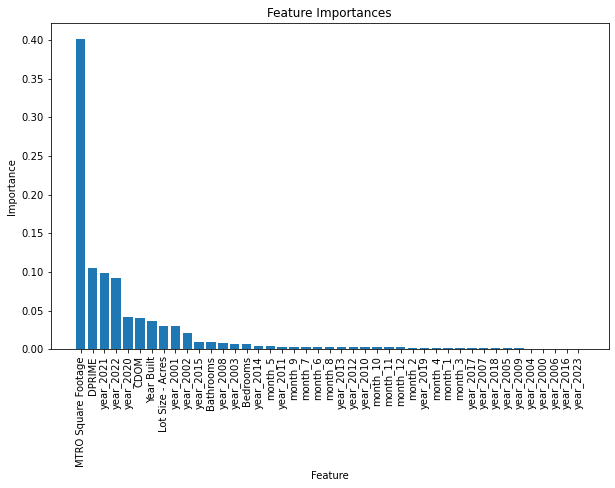

In [27]:
#Get feature importances for Random Forest Regression
feature_importances = regressor.feature_importances_

#Extract the feature names from your DataFrame
feature_names = X_train.columns.tolist()

#Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

#Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [28]:
#Model 4 - Gradient Boosting Regression
#Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

#Create a Gradient Boosting Regressor model
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

#Fit the model to the training data
regressor.fit(X_train, y_train)

#Make predictions on the test data
y_pred = regressor.predict(X_test)

#Evaluate model performance using mean squared error (MSE), 
#Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 5168093763.004319
Root Mean Squared Error (RMSE): 71889.45515862753
Mean Absolute Error (MAE): 48276.863356937865
R-squared: 0.7767910884101754


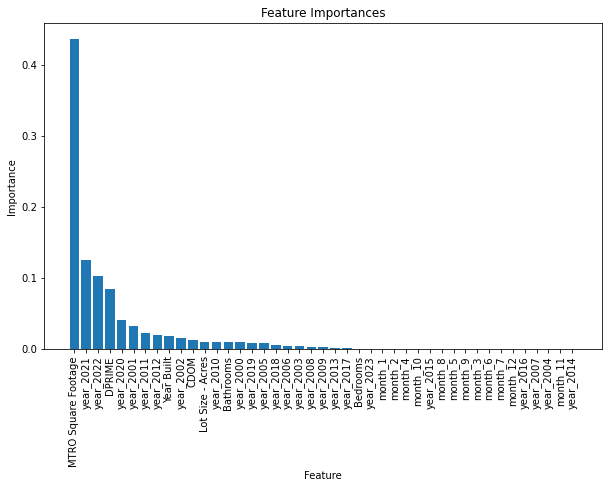

In [29]:
#Get feature importances for Gradient Boosting Regression
feature_importances = regressor.feature_importances_

#Extract the feature names from X_train
feature_names = X_train.columns.tolist()

#Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

#Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

#### Model Selection: Random Forest Regression
Random Forest regression has the lowest Mean Squared Error, Root Mean Squared Error, Absolute Error and also the highest R-squared. So let's move forward with hyperparameter tuning of this model.

In [30]:
#Hyperparameter tuning for Random Forest regression model
#Import necessary libraries
from sklearn.model_selection import GridSearchCV

#Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       #Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      #Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],     #Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],       #Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt']      #Number of features to consider for splitting
}

#Create Random Forest regressor
rf_regressor = RandomForestRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Print best hyperparameters and corresponding mean squared error
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

In [31]:
#Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
#Best Mean Squared Error: 4544917928.622559

#Using the best hyperparameters reduces the MSE
#Access the best model
best_rf_model = grid_search.best_estimator_

#Use best_rf_model to make predictions on test data
y_pred = best_rf_model.predict(X_test)

#Evaluate best_rf_model performance on test data using mean squared error (MSE), 
#Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4857022005.909885
Root Mean Squared Error (RMSE): 69692.33821525781
Mean Absolute Error (MAE): 46414.38505015631
R-squared: 0.790226213915139


#### Visualizations

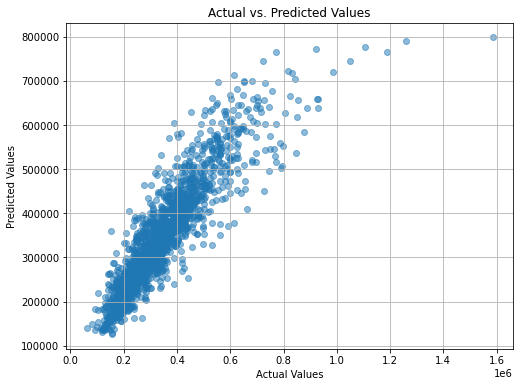

In [32]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

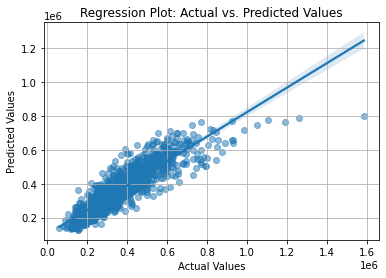

In [33]:
#Create a regression plot
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted Values")
plt.grid(True)
plt.show()